In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_faba = pd.read_csv('../researcher_data_priv/faba_success.csv')
df_duo = pd.read_csv('../researcher_data_priv/duo_success.csv')
df_forms = pd.read_csv('../researcher_data_priv/forms.csv')

print(df_faba.head())
print(df_duo.head())
print(df_forms.head())

   Participant  Attempt_1  Attempt_2  Attempt_3  count_attempt
0            1          0          1          1              4
1            2          1          1          1              2
2            3          0          0          0              1
3            4          1          1          1              4
4            5          1          1          1              4
   Participant  Attempt_1  Attempt_2  Attempt_3  count_attempt
0            1          1          1          1              1
1            2          1          1          1              1
2            3          1          1          1              1
3            4          1          1          1              1
4            5          1          1          1              1
   Participant            Timestamp Enter your FULL NAME, not NICKNAME:  \
0            1  12/19/2025 11:53:48                Dimas Anggoro Sakti    
1            2  12/19/2025 12:01:32                      Bryan Anderson   
2            3  12/

Text(0.5, 0, 'Participant')

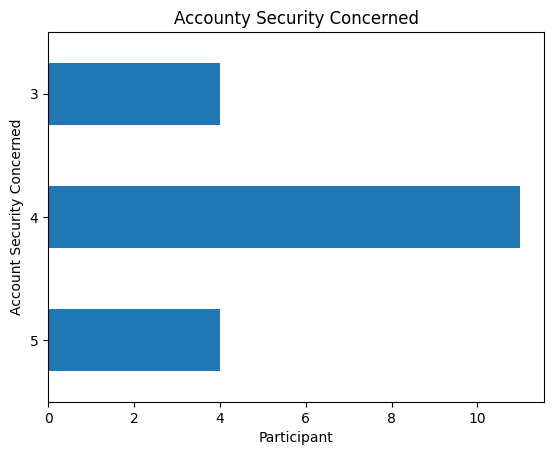

In [3]:
counts = df_forms["account_security"].value_counts().sort_index(ascending=False)

plt.figure()
counts.plot(kind="barh")
plt.title("Accounty Security Concerned")
plt.ylabel("Account Security Concerned")
plt.xlabel("Participant")


Authenticator_Tool
Google Authenticator (6-digit codes)         17
Biometric (fingerprint, face recognition)    16
SMS text message codes                       15
Email verification codes                     12
Hardware token (YubiKey, etc.)                2
Duo Mobile (push notifications)               2
Authenticator microsoft                       1
Authy                                         1
Name: count, dtype: int64


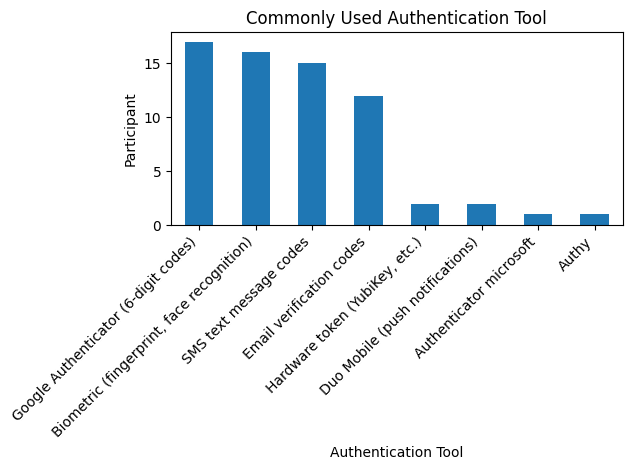

Authenticator_Tool
Google Authenticator (6-digit codes)         17
Biometric (fingerprint, face recognition)    16
SMS text message codes                       15
Email verification codes                     12
Hardware token (YubiKey, etc.)                2
Duo Mobile (push notifications)               2
Authenticator microsoft                       1
Authy                                         1
Name: count, dtype: int64


In [4]:
# Common Used Authenticator
methods_series = (
    df_forms["Authenticator_Tool"]
    .dropna()
    .str.split(r",\s(?![^()]*\))")  
    .explode()
    .str.strip()
)

method_counts = methods_series.value_counts()
print(method_counts)


plt.figure()
method_counts.plot(kind="bar")
plt.title("Commonly Used Authentication Tool")
plt.xlabel("Authentication Tool")
plt.ylabel("Participant")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(method_counts)


Data FABA:
   Participant  Attempt_1  Attempt_2  Attempt_3  count_attempt
0            1          0          1          1              4
1            2          1          1          1              2
2            3          0          0          0              1
3            4          1          1          1              4
4            5          1          1          1              4

Data DUO:
   Participant  Attempt_1  Attempt_2  Attempt_3  count_attempt
0            1          1          1          1              1
1            2          1          1          1              1
2            3          1          1          1              1
3            4          1          1          1              1
4            5          1          1          1              1
Index(['Participant', 'Attempt_1', 'Attempt_2', 'Attempt_3', 'count_attempt'], dtype='object')


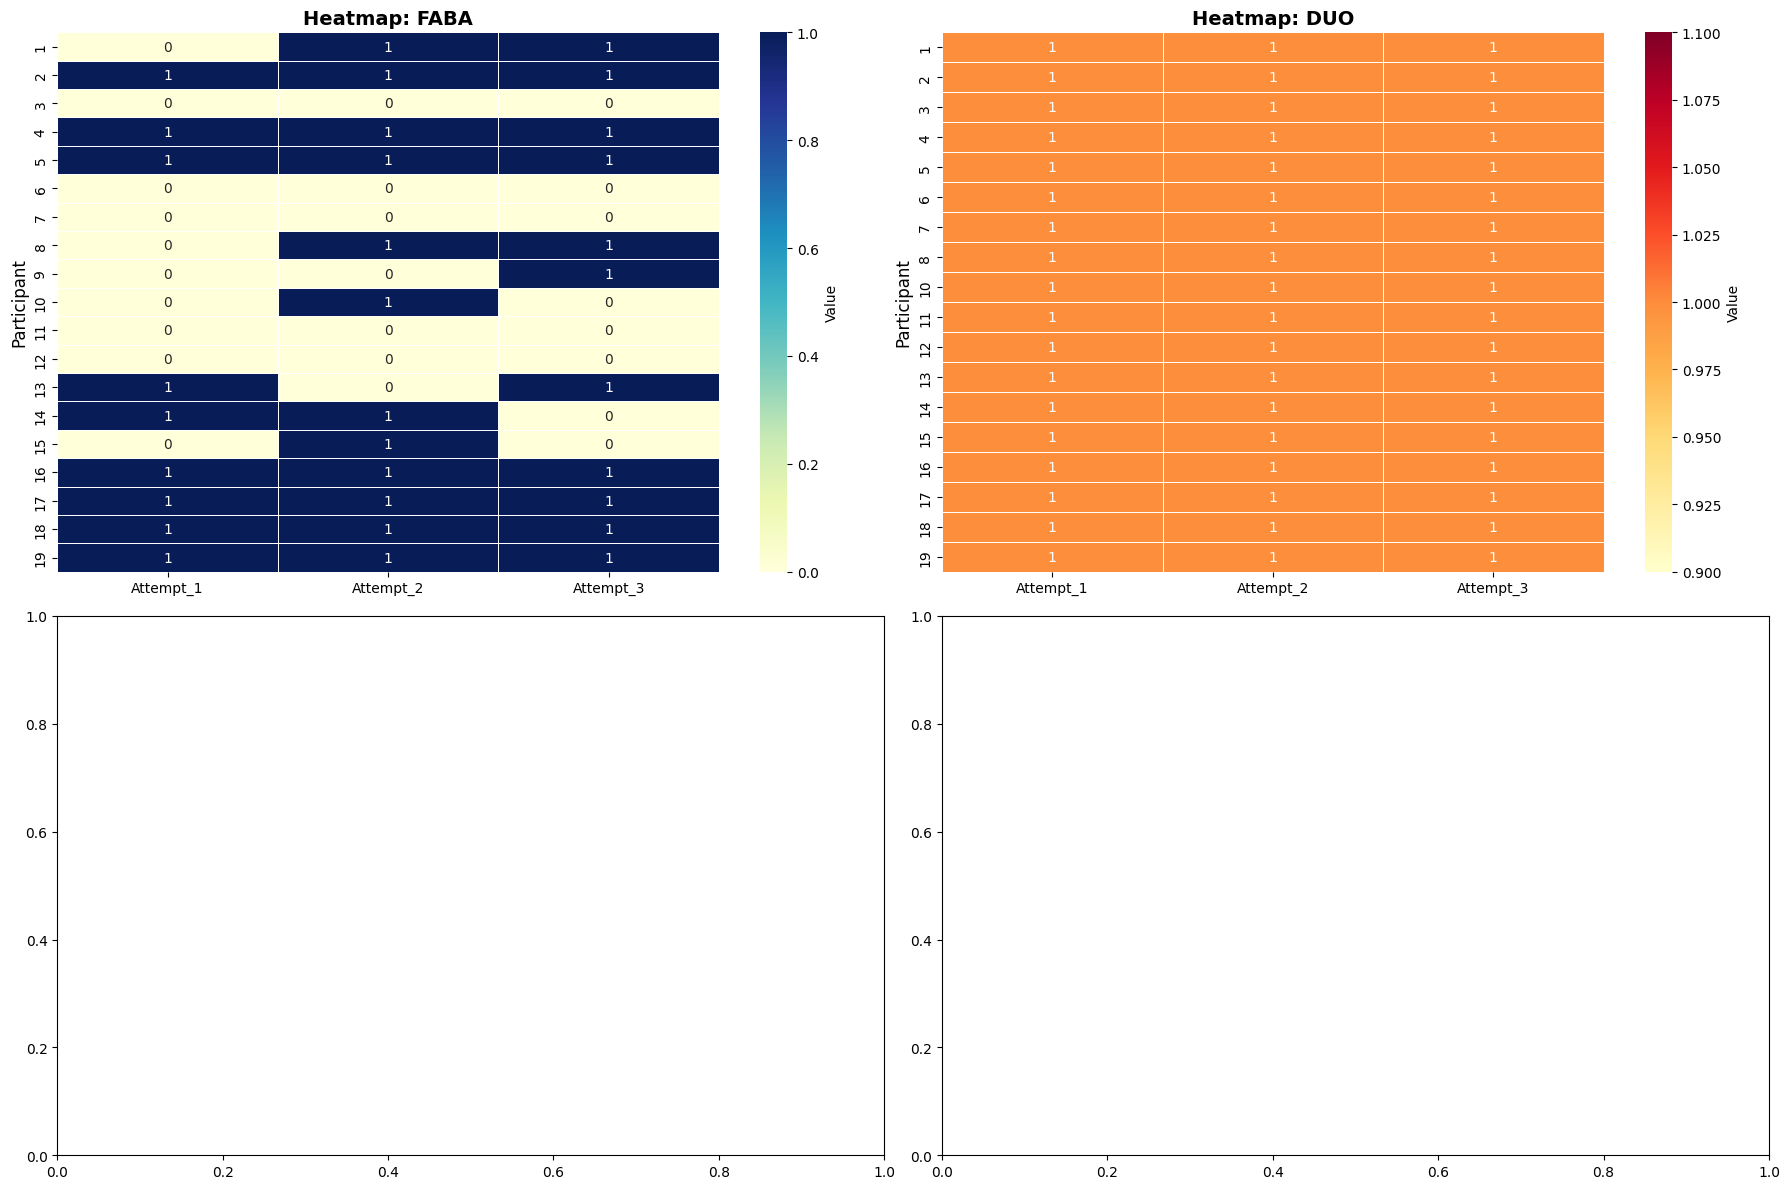

In [5]:
df_faba = pd.read_csv('../researcher_data_priv/faba_success.csv')
df_duo = pd.read_csv("../researcher_data_priv/duo_success.csv")

print("Data FABA:")
print(df_faba.head())
print("\nData DUO:")
print(df_duo.head())

print(df_duo.columns)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

ax1 = axes[0, 0]
df_plot_faba = df_faba.set_index('Participant')[['Attempt_1','Attempt_2','Attempt_3']]
sns.heatmap(df_plot_faba, annot=True, fmt='d', cmap='YlGnBu', 
            cbar_kws={'label': 'Value'}, ax=ax1, linewidths=0.5)
ax1.set_title('Heatmap: FABA', fontsize=14, fontweight='bold')
ax1.set_ylabel('Participant', fontsize=12)

ax2 = axes[0, 1]
df_plot_duo = df_duo.set_index('Participant')[['Attempt_1','Attempt_2','Attempt_3']]
sns.heatmap(df_plot_duo, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Value'}, ax=ax2, linewidths=0.5)
ax2.set_title('Heatmap: DUO', fontsize=14, fontweight='bold')
ax2.set_ylabel('Participant', fontsize=12)


plt.tight_layout()
plt.show()

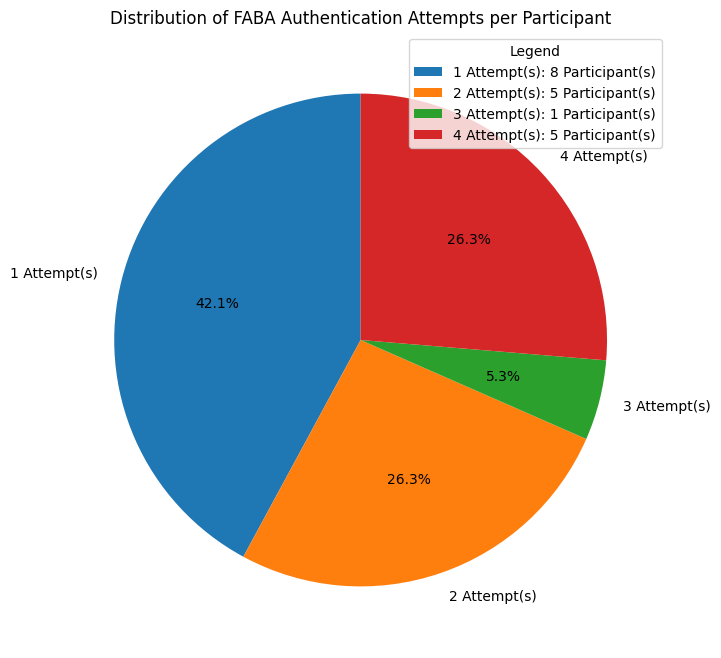

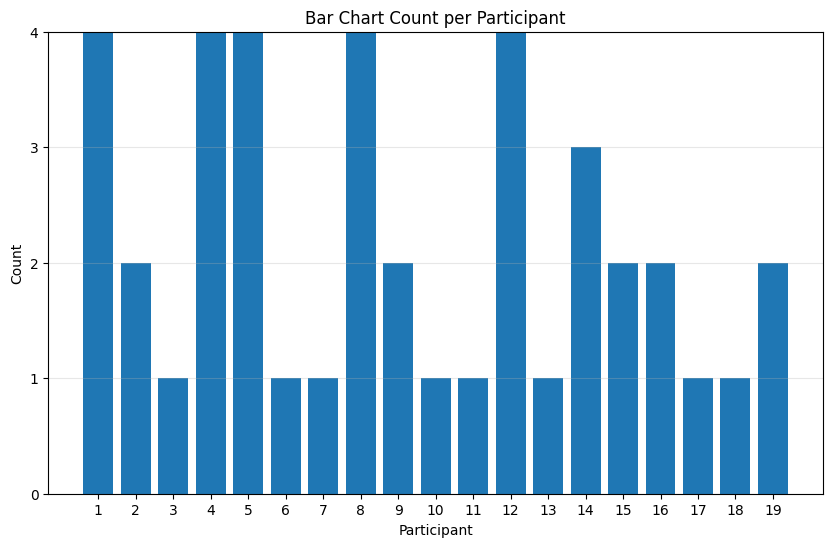

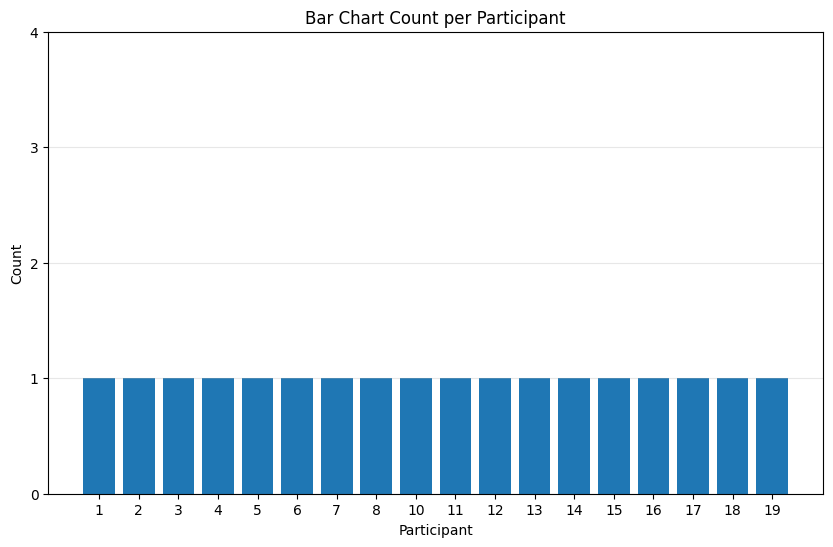

In [ ]:
attempt_count = df_faba['count_attempt'].value_counts().sort_index()
percentage = attempt_count / attempt_count.sum() * 100
labels = [f"{i} Attempt(s)" for i in attempt_count.index]

plt.figure(figsize=(8, 8))
plt.pie(
    attempt_count,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribution of FABA Authentication Attempts per Participant")
plt.legend(
    labels=[
        f"{attempt} Attempt(s): {count} Participant(s)"
        for attempt, count in attempt_count.items()
    ],
    title="Legend",
    loc="best"
)
plt.show()


# x = np.arange(len(df_faba))

# plt.figure(figsize=(10,6))

# plt.bar(x, df_faba['count_attempt'])

# plt.xticks(x, df_faba['Participant'], ha='center')
# plt.xlabel('Participant')
# plt.ylabel('Count')
# plt.ylim(1, 4)
# plt.yticks([0,1, 2, 3, 4])

# plt.title('Bar Chart Count per Participant')
# plt.grid(axis='y', alpha=0.3)
# plt.show()

# y = np.arange(len(df_duo))

# plt.figure(figsize=(10,6))

# plt.bar(y, df_duo['count_attempt'])

# plt.xticks(y, df_duo['Participant'], ha='center')
# plt.xlabel('Participant')
# plt.ylabel('Count')
# plt.ylim(1, 4)
# plt.yticks([0, 1, 2, 3, 4])

# plt.title('Bar Chart Count per Participant')
# plt.grid(axis='y', alpha=0.3)
# plt.show()

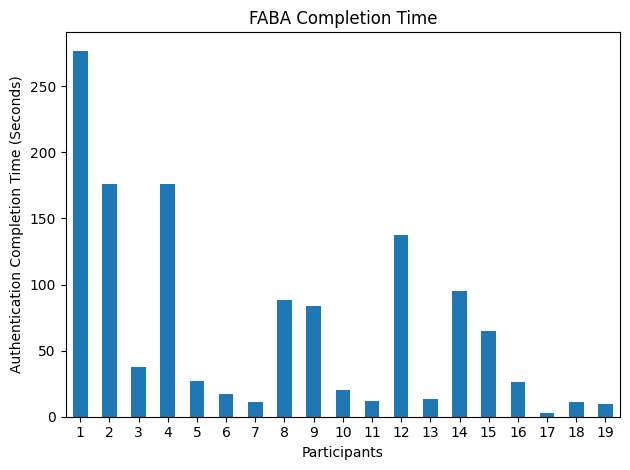

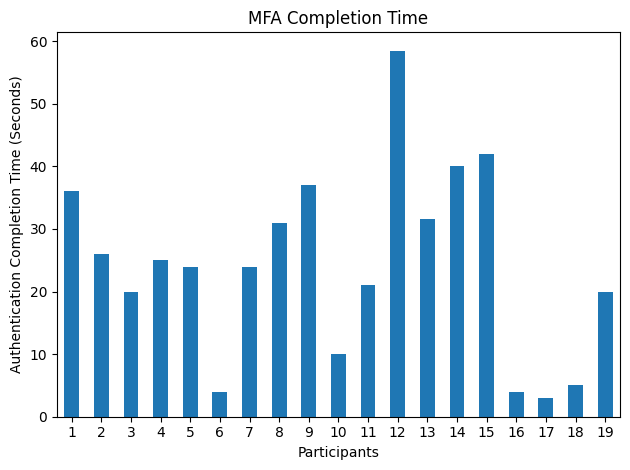

In [19]:
df_forms.plot(
    x="Participant",
    y="FABA_Completion_Time",
    kind="bar",
    legend=False,
    rot=360  
)

plt.title("FABA Completion Time")
plt.ylabel("Authentication Completion Time (Seconds)")
plt.xlabel("Participants")

plt.tight_layout()
plt.show()


df_forms.plot(
    x="Participant",
    y="MFA_Completion_Time",
    kind="bar",
    legend=False,
    rot=360
)

plt.title("MFA Completion Time")
plt.ylabel("Authentication Completion Time (Seconds)")
plt.xlabel("Participants")

plt.tight_layout()
plt.show()


['FABA_SUS_1', 'FABA_SUS_2', 'FABA_SUS_3', 'FABA_SUS_4', 'FABA_SUS_5', 'FABA_SUS_6', 'FABA_SUS_7', 'FABA_SUS_8', 'FABA_SUS_9', 'FABA_SUS_10', 'FABA_SUS_Avg']
['MFA_SUS_1', 'MFA_SUS_2', 'MFA_SUS_3', 'MFA_SUS_4', 'MFA_SUS_5', 'MFA_SUS_6', 'MFA_SUS_7', 'MFA_SUS_8', 'MFA_SUS_9', 'MFA_SUS_10', 'MFA_SUS_Avg']


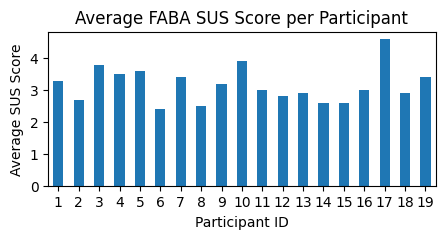

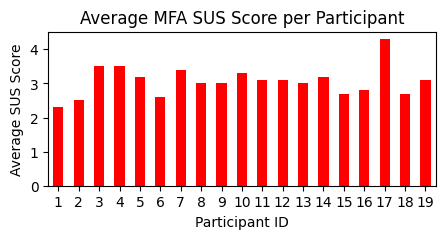

In [31]:
FABA_SUS = [col for col in df_forms.columns if col.startswith("FABA_SUS_")]
df_forms["FABA_SUS_Avg"] = df_forms[FABA_SUS].mean(axis=1)

MFA_SUS = [col for col in df_forms.columns if col.startswith("MFA_SUS_")]
df_forms["MFA_SUS_Avg"] = df_forms[MFA_SUS].mean(axis=1)

print(FABA_SUS)
print(MFA_SUS)

df_forms.plot(
    x="Participant",
    y="FABA_SUS_Avg",
    kind="bar",
    legend=False,
    rot = 360,
    figsize=(5,2)
)
plt.title("Average FABA SUS Score per Participant")
plt.xlabel("Participant ID")
plt.ylabel("Average SUS Score")
plt.show()


df_forms.plot(
    x="Participant",
    y="MFA_SUS_Avg",
    kind="bar",
    legend=False,
    rot = 360,
    color="red",
    figsize=(5,2)
)
plt.title("Average MFA SUS Score per Participant")
plt.xlabel("Participant ID")
plt.ylabel("Average SUS Score")
plt.show()